# 1 - Perkenalan

Nama : Dicky Librata Sembiring

Batch : FTDS-003

Dataset : Insurance

Objective : Memprediksi Biaya Asuransi Yang Harus Dibayar Customer

# 2 - Import Libraries

In [39]:
# Import Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score

import phik
from phik import resources, report

import pickle

# 3 - Data Loading

> Berikut adalah proses load dataset beserta ekplorasi sederhana untuk mencari informasi dasar dari dataset

In [40]:
# Load Dataset
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
# Duplicate Dataset
data_backup = data.copy()

In [42]:
# Check Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
# Check Dataset 2
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Berdasarkan tabel, dapat dilihat bahwa column `children` memiliki rata-rata `1.09`. Boleh diasumsikan bahwa kemungkinan customer dari asuransi ini `belum menikah` atau sudah menikah namun `memiliki sedikit anak`.

# 4 - Exploratory Data Analysis (EDA)

1. Berapa peserta asuransi yang tergolong overweight berdasarkan class-nya. Urutkan dari jumlah terbanyak hingga terkecil.
    - overweight class 1 : 30 ≤ BMI < 35
    - overweight class 2 : 35 ≤ BMI < 40
    - overweight class 3 : BMI ≥ 40


In [44]:
class_1 = []
class_2 = []
class_3 = []

for i,j in enumerate(data.bmi):
    if (j <= 30) & (j <35):
        class_1.append(i)
    elif (j<= 35) & (j < 40):
        class_2.append(i)
    elif (j >= 40):
        class_3.append(i)

cust_bmi_cat = pd.DataFrame({'overweight class 1' : [len(class_1)], 'overweight class 2' : [len(class_2)], 'overweight class 3' : [len(class_3)]})
cust_bmi_cat

,overweight class 1,overweight class 2,overweight class 3
0,633,389,91


Dari data diatas diperoleh bahwa customer yang overweight paling banyak berada di `class 1` dengan `633 customer` kemudian `class 2` dengan `389 customer` dan `class 3` dengan `91 customer`

2. Adakah keterkaitan antara bmi, smoker, dan charges pada dataset ini ? Tunjukkan dengan visualisasi yang menunjukkan keterkaitan tiga hal ini pada satu plot yang sama ! Narasikan dengan bahasa Anda sendiri 

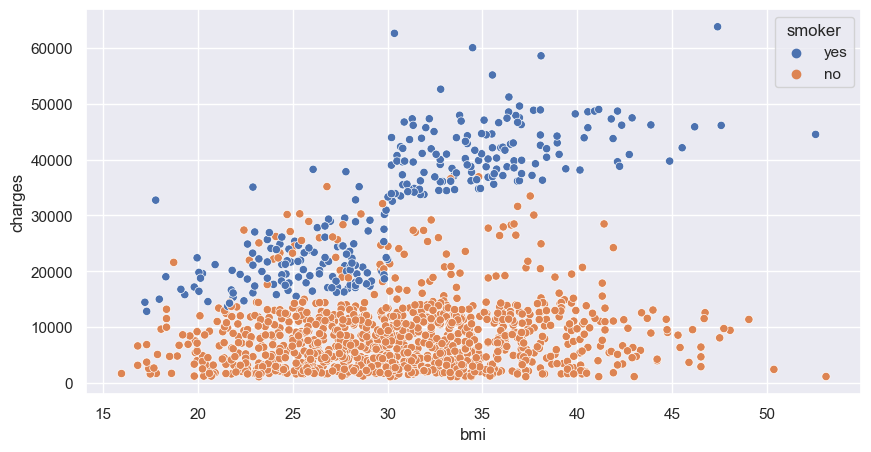

In [45]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x='bmi', hue='smoker', y='charges')
sns.set()

Dri plot diatas dapat di dilihat bahwa terdapat hubungan antara `smoker dan bmi` dengan `charges`.
   - Charges antara customer dengan BMI yang sama namun namun tidak merokok `lebih rendah` dari customer yang merokok
   - Customer dengan behavior yang sama dalam hal merokok memiliki charges lebih tinggi apabila BMI nya lebih tinggi dari customer lain

### Cek Phi_k Correlation

In [46]:
# Cek nilai korelasi phi_k
phi_k_val = data.phik_matrix().charges

# Tampilkan nilai korelasi phi_k descending
phi_k_val.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'bmi', 'children', 'charges']


charges     1.000000
smoker      0.962929
age         0.728589
bmi         0.377234
region      0.108190
sex         0.081902
children    0.032233
Name: charges, dtype: float64

Nilai korelasi `phi_k` adalah `0 = tidak berkorelasi` dan `1 = sangat berkorelasi`.
Dari nilai ini penulis menentukan threshold `0.3` yang memiliki arti `minimal terdapat 30 percent koreleasi`

Dari nilai phi_k dapat diketahui bahwa kolom yang memiliki nilai korelasi diatas adalah `smoker`, `age`, `bmi` sedangkan `region` , `sex` , `children` memiliki korelasi yang relatif kecil

Hal tersebut juga dapat di lihat pada plot berikut ini

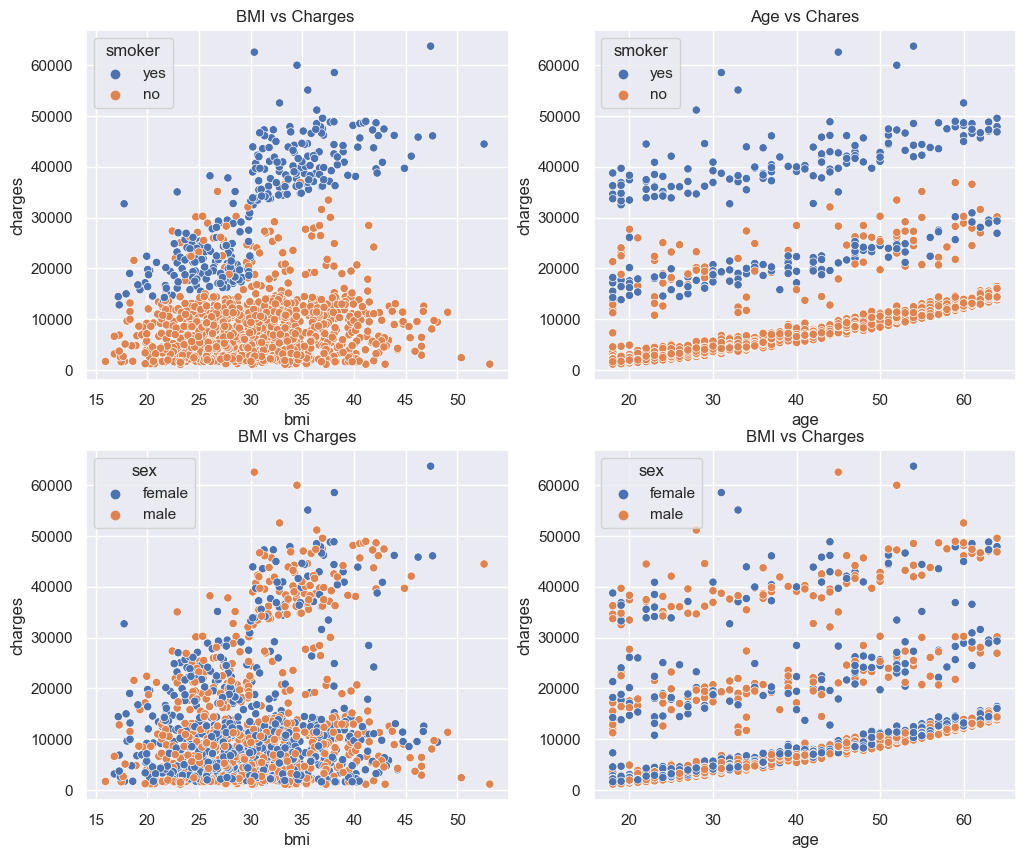

In [47]:
# Cek distribusi data

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[12,10])

a = sns.scatterplot(x='bmi', y='charges',hue='smoker', data=data, ax=ax[0,0])
a.set_title('BMI vs Charges ')

b = sns.scatterplot(x='age', y='charges',hue='smoker', data=data, ax=ax[0,1])
b.set_title('Age vs Chares')

c = sns.scatterplot(x='bmi', y='charges', hue='sex', data=data, ax=ax[1,0])
c.set_title('BMI vs Charges')

d = sns.scatterplot(x='age', y='charges', hue='sex', data=data, ax=ax[1,1])
d.set_title('BMI vs Charges')
plt.show()

Pada plot diatas ternyata `smoker` memang berpengaruh dengan charges dan yang mana pada `BMI vs Charges` customer yang tidak merokok memiliki charges lebih rendah daripada yang merokok. Begitu juga pada plot `Age vs Charges`

Sedangkan distribusi `sex` pada plot `BMI vs Charges` dan `Age vs Charges` tidak ada pengaruh pada charges. Karena justru distribusi data `sex` menyebar pada nilai `charges` yang berbeda beda

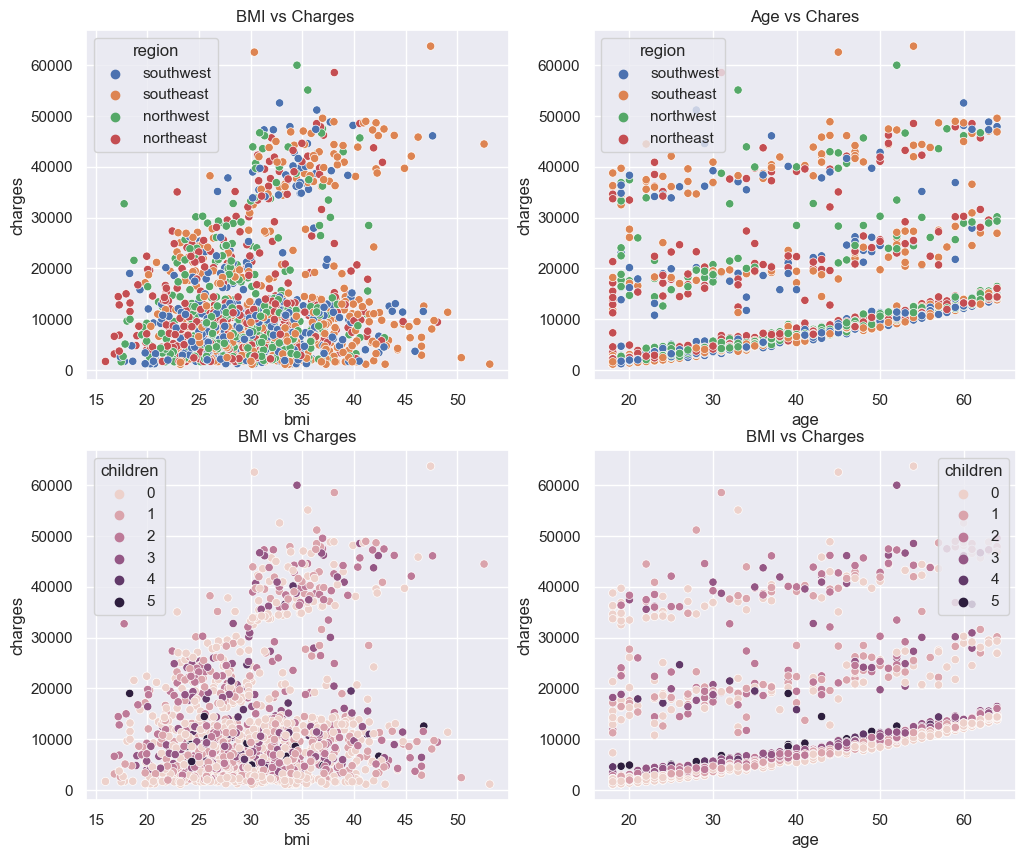

In [48]:
# Cek distribusi data

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[12,10])

a = sns.scatterplot(x='bmi', y='charges',hue='region', data=data, ax=ax[0,0])
a.set_title('BMI vs Charges ')

b = sns.scatterplot(x='age', y='charges',hue='region', data=data, ax=ax[0,1])
b.set_title('Age vs Chares')

c = sns.scatterplot(x='bmi', y='charges', hue='children', data=data, ax=ax[1,0])
c.set_title('BMI vs Charges')

d = sns.scatterplot(x='age', y='charges', hue='children', data=data, ax=ax[1,1])
d.set_title('BMI vs Charges')
plt.show()

Hal yang sama terjadi pada kolom `region` dan `children`. Distribusi datanya tersebar pada nilai `charges` yang berbeda beda. Sehingga penulis memutuskan untuk memakai kolom `smoker`, `age`, dan `bmi` pada prediksi kolom `charges`

Setelah memutuskan untuk memilih fitur maka selanjutnya adalah melihat distribusi data masing masing fitur

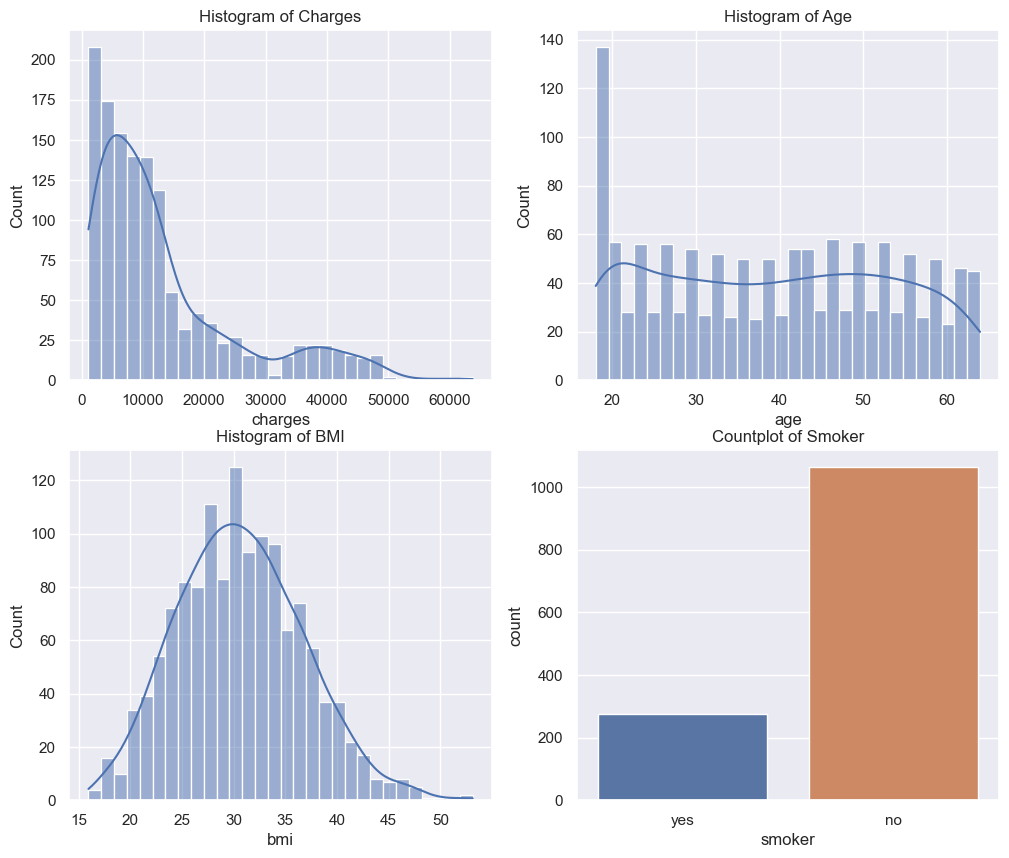

In [49]:
# Cek distribusi data

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[12,10])

a = sns.histplot(data['charges'], bins=30, kde=True, ax=ax[0,0])
a.set_title('Histogram of Charges')

b = sns.histplot(data['age'], bins=30, kde=True, ax=ax[0,1])
b.set_title('Histogram of Age')

c = sns.histplot(data['bmi'], bins=30, kde=True, ax=ax[1,0])
c.set_title('Histogram of BMI')

d = sns.countplot(data=data, x='smoker', ax=ax[1,1])
d.set_title('Countplot of Smoker')

plt.show()

Secara sekilas dapat dilihat bahwa distribusi normal terdapat pada kolom `bmi` dan tidak normal pada `chahrges` dan `age`, serta imbalance data pada kolom `smoker`

# 5 - Data Preprocessing

## Membuat Data Train Test

In [50]:
data_train_test = data[['bmi','age','smoker','charges']]
data_train_test.head()

,bmi,age,smoker,charges
0,27.900,19,yes,16884.92400
1,33.770,18,no,1725.55230
2,33.000,28,no,4449.46200
3,22.705,33,no,21984.47061
4,28.880,32,no,3866.85520


## Menentukan Fitur Numerical Atau Categorical

In [51]:
# Get Numerical Columns and Categorical Columns

num_columns = ['bmi', 'age']
cat_columns = ['smoker']

## Splitting Train Test

In [52]:
data_train, data_test = train_test_split(data_train_test, test_size=0.2, random_state=42)
print(f"train size : {data_train.shape}")
print(f"test size : {data_test.shape}")

train size : (1070, 4)
test size : (268, 4)


## Handling Outlier


In [53]:
for i in data_train[num_columns]:
    print(f'Nilai Skew {i} : {data_train[i].skew()}')

Nilai Skew bmi : 0.2707966258877336
Nilai Skew age : 0.027276492267042526


In [54]:
# Buat fungsi untuk cek dan trimming outlier
def cek_outlier(data,col):
  skew = data[col].skew()
  if skew>=-0.5 and skew<=0.5:
    up_lim = data[col].mean() + 3*data[col].std()
    low_lim = data[col].mean() - 3*data[col].std()
  else:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q1 + 1.5*IQR
    low_lim = Q3 - 1.5*IQR
  
  data_clean = data[(data[col]>=low_lim) & (data[col]<=up_lim)]
  outliers = data[(data[col]<low_lim) | (data[col]>up_lim)]

  return outliers,data_clean, up_lim, low_lim

In [55]:
bmi_out, data_train, bmi_up, bmi_low = cek_outlier(data_train,'bmi')
age_out, data_train, age_up, age_low = cek_outlier(data_train,'age')

In [56]:
for i in data_train[num_columns]:
    print(f'Nilai Skew {i} : {data_train[i].skew()}')

Nilai Skew bmi : 0.19869831079710382
Nilai Skew age : 0.026208910246532862


## Handling Missing Value

In [57]:
# Check Missing Value Pada Fitur data Train
data_train.isnull().sum()

bmi        0
age        0
smoker     0
charges    0
dtype: int64

In [58]:
# Check Missing Value Pada Fitur data Test
data_test.isnull().sum()

bmi        0
age        0
smoker     0
charges    0
dtype: int64

## Splitting Fitur Target

In [59]:
# Split antara `X` (Features) dan `y` (Target) pada Data Train
X_train = data_train.drop('charges', axis=1)
y_train = data_train['charges']
X_train.head(3)

,bmi,age,smoker
560,19.95,46,no
1285,24.32,47,no
1142,24.86,52,no


In [60]:
# Split antara `X` (Features) dan `y` (Target) pada Data Train
X_test = data_test.drop('charges', axis=1)
y_test = data_test['charges']
X_test.head(3)

,bmi,age,smoker
764,25.175,45,no
887,30.020,36,no
890,26.885,64,yes


## Split between Numerical Columns and Categorical Columns

In [61]:
# Cek masing - masing kolom numerikal dan kategorial
print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['bmi', 'age']
Categorical Columns :  ['smoker']


In [62]:
# Pisahkan masing masing jenis data pada fitur test dan train

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

## Feature Scaling

In [63]:
# Tampilkan Data Train Numerik Fitur
X_train_num.head(3)

,bmi,age
560,19.95,46
1285,24.32,47
1142,24.86,52


In [64]:
# Feature Scaling Dengan MinMaxScaler Karena Distribusi Sudah Memiliki Distribusi Normal

scaler = MinMaxScaler()
feature_names = scaler.get_feature_names_out(input_features=num_columns)

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=feature_names)

X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=feature_names)

X_train_num_scaled.head(3)

,bmi,age
0,0.125551,0.608696
1,0.263059,0.630435
2,0.280050,0.739130


## Feature Encoding

In [65]:
# Tampilkan fitur kategorikal pada data train
X_train_cat.head(3)

,smoker
560,no
1285,no
1142,no


In [66]:
# Fitur scalling dengan one hot encdoer

ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_cat_ohe = ohe.fit_transform(X_train_cat[cat_columns])
feature_names_ohe = ohe.get_feature_names_out(input_features=cat_columns)
X_train_cat_encoded = pd.DataFrame(X_train_cat_ohe, columns=feature_names_ohe)

X_test_cat_ohe = ohe.transform(X_test_cat[cat_columns])
X_test_cat_encoded = pd.DataFrame(X_test_cat_ohe, columns=feature_names_ohe)

X_train_cat_encoded.head(3)

,smoker_no,smoker_yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0


## Concate between Numerical Columns and Categorical Columns

In [67]:
# Gabungkan kembali fitur numerikal dan kategorial

X_train_final = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

X_train_final.head(3)

,bmi,age,smoker_no,smoker_yes
0,0.125551,0.608696,1.0,0.0
1,0.263059,0.630435,1.0,0.0
2,0.280050,0.739130,1.0,0.0


# 6 - Model Definition

> Model machine learning yang digunakan adalah `polynominal linear regresi`. Alasan penulis memilih model ini karena :
- fitur yang telah di pilih merupakan fitur yang memiliki `hubungan` secara `linear` dengan target.
- karena korelas antara data fitur dengan target yang telah penulis lihat pada bagian EDA `tidak linear sempurna`, maka penulis memutuskan untuk menggukanan model polinominal
- hyperparameter yang digunakan adalah :
    - `degree = 2` karena berdasarkan sebaran data sebelumnya, garis linear yang paling cocok mengikuti hubungan antara fitur dan target adalah garis linear pangkat 2
    - `intersection_only = True` karena untuk mengurangi waktu proses model belajar. selain itu penulis sudah melakukan percobaan dengan mengikutsertakan interction namun tidak ada perbedaan signifikan dari hasil predict model

In [68]:
# Tentukan algoritma yang akan di pakai
model_lin_reg = LinearRegression()

# Transform fitur menjadi polynominal linear regresi dengan pangkat 2
polynomial_converter = PolynomialFeatures(degree=2,interaction_only=False, include_bias=False)
poly_features_train = polynomial_converter.fit_transform(X_train_final)
poly_features_test = polynomial_converter.transform(X_test_final)

# 7 - Model Training

In [69]:
# Proses train model dengan algoritma yang di pilih
model_lin_reg.fit(poly_features_train, y_train)

LinearRegression()

# 8 - Model Evaluation

> Metrics evaluasi yang digunakan adalah `Mean Absolute Error` dan `R2 Score`.
> - `Mean Absolute Error ( MEA )` : Digunakan untuk mengukur besaran eror dari prediksi model terhadapt nilai sebearnya dari target
> - `R2 Scrore` : Digunakan untuk melihat bagaimana performa model dalam mengikuti pola dari data yang tersedia

In [70]:
# Predict target data train dan dat tes
y_pred_train = model_lin_reg.predict(poly_features_train)
y_pred_test = model_lin_reg.predict(poly_features_test)

In [71]:
# Evaluasi dengan MAE dan R2 Score
print('-'*20, 'TRAIN EVALUATION','-'*20)
print('MEA Train      :', mean_absolute_error(y_train, y_pred_train))
print('R2 Score Train :', r2_score(y_train, y_pred_train))

print('\n','-'*20, 'TEST EVALUATION','-'*20)
print('MEA Test       :', mean_absolute_error(y_test, y_pred_test))
print('R2 Score Test  :', r2_score(y_test, y_pred_test))

-------------------- TRAIN EVALUATION --------------------
MEA Train      : 2888.8130267197753
R2 Score Train : 0.8281919039209419

 -------------------- TEST EVALUATION --------------------
MEA Test       : 2728.0773624962685
R2 Score Test  : 0.8567150029349822


In [72]:
# Perbandingan metric data train dan data test
print('Nilai Target Aktual Terkecil', y_train.min())
print('Nilai Target Prediksi Terkecil', y_pred_train.min())
print('Nilai Target Aktual Terbesar', y_train.max())
print('Nilai Target Prediksi Terkecil', y_pred_train.max())
print('Nilai Target Aktual Terbesar', y_train.mean())
print(f'Persentase MAE Terhadap Nilai Aktaul Terkecil : {(mean_absolute_error(y_train, y_pred_train) / y_train.min() * 100):.2f} %')
print(f'Persentase MAE Terhadap Nilai Aktaul Terbesar : {(mean_absolute_error(y_train, y_pred_train) / y_train.max() * 100):.2f} %')
print(f'Persentase MAE Terhadap Nilai Aktaul Terbesar : {(mean_absolute_error(y_train, y_pred_train) / y_train.mean() * 100):.2f} %')

Nilai Target Aktual Terkecil 1121.8739
Nilai Target Prediksi Terkecil 1920.0
Nilai Target Aktual Terbesar 62592.87309
Nilai Target Prediksi Terkecil 55424.0
Nilai Target Aktual Terbesar 13369.571859990629
Persentase MAE Terhadap Nilai Aktaul Terkecil : 257.50 %
Persentase MAE Terhadap Nilai Aktaul Terbesar : 4.62 %
Persentase MAE Terhadap Nilai Aktaul Terbesar : 21.61 %


#### Analisi Nilai MAE dan R2 Score Data Train
> Nilai MEA pada data train bernilai `1.1121.87` memiliki arti bahwa terdapat eror sebesar kurang lebih `1.1121.87` dari nilai prediksi model. Apabila di bandingkan dengan nilai aktual maka nilai MAE adalah `257.50% dari nilai aktual terkecil`. Namun hanya `4.62% dari nilai aktual terbesar` dan ` 21.61% dari nilai rata rata data aktual`

> Nilai R2 Score menunjukkan bagaimana model mengikuti pola dari dataset yang dipelajari. Ranga nilai R2 Score adalahh antara 0 - 1 dengan 1 merupakan saat model berhasil secara sempurna mengikuti pola. Nilai R2 Score pada data train `0.82` berarti model berhasil mengikuti pola data sebbesar 82%

### 1. Prediksi Model 
#### ii. Nilai terbesar dan terkecil dari prediksi Model

In [73]:
# Perbandingan metric data train dan data test
print('Nilai Target Prediksi Terkecil', y_pred_train.min())
print('Nilai Target Prediksi Terbesar', y_pred_train.max())

Nilai Target Prediksi Terkecil 1920.0
Nilai Target Prediksi Terbesar 55424.0


#### iii. Perbandingan dengan nilai terkecil dan terbesar model dengan data aktual

In [74]:
# Perbandingan metric data train dan data test
print('Nilai Target Aktual Terkecil', y_train.min())
print('Nilai Target Prediksi Terkecil', y_pred_train.min())
print('Nilai Target Aktual Terbesar', y_train.max())
print('Nilai Target Prediksi Terbesar', y_pred_train.max())

Nilai Target Aktual Terkecil 1121.8739
Nilai Target Prediksi Terkecil 1920.0
Nilai Target Aktual Terbesar 62592.87309
Nilai Target Prediksi Terbesar 55424.0


#### iv. Analisa dari ii dan iii

Hasil prediksi dari model pada data terkecil berada di atas dari nilai terkecil data aktual. Sedangkan nilai terbesar nya predict berada di bawah nilai terbesar dari data aktual. Ini dapat diasumsikan bahwa prediksi eror dari prediksi model bervariatif. Tidak hanya berada pada satu sisi lebih besar dari nilai aktual atau lebih kecil dari nilai aktual. Dengan kata lain error model adalah `Heterocedascity`

### 2. Apakah model Anda cenderung menghasilkan harga prediksi yang lebih rendah ataukah cenderung menghasilkan harga prediksi yang lebih tinggi dari harga sebenarnya baik dari train-set maupun test-set ? Buktikan hal ini dengan sebuah eksplorasi

In [75]:
print(f'y data train index ke 10 : {y_train.iloc[5]}')
print(f'y predict data train index ke 10 : {y_pred_train[5]}')

y data train index ke 10 : 13405.3903
y predict data train index ke 10 : 15616.0


In [76]:
print(f'y data test index ke 10 : {y_test.iloc[32]}')
print(f'y predict data test index ke 10 : {y_pred_test[32]}')

y data test index ke 10 : 2020.5523
y predict data test index ke 10 : 3456.0


Dari eksplorasi diatas ditemukan bahwa hasil predict model baik pada data train dan data test berada di atas dari data aktual

### 3. Apa kelebihan dan kelemahan model yang Anda buat untuk kasus ini ?
- Kelebihan :
    - Model mampu mengikuti pola data sebesar 82.8% pada data train dan `85.6%` pada data test
    - Model sudah `good fit` dengan selisih eror train dan test hanya `160,74` dan kemampuan mengikuti pola data sebesar `85.6%`
- Kelemahan
    - nilai eror masih cukup besar bisa di bandingkan dengan nilai terkecil dari data aktual.
    - Kecendrungan model memprediksi lebih memiliki nilai lebih besar dari data aktual.



# 9 - Model Saving

In [77]:
# Model Saving

with open('minmax_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

with open('one_hot_encoder.pkl', 'wb') as file_2:
  pickle.dump(ohe, file_2)

with open('model_lin_reg.pkl', 'wb') as file_4:
  pickle.dump(model_lin_reg, file_4)

with open('list_num_columns.txt', 'w') as file_5:
  file_5.write(str(num_columns))

with open('list_cat_columns.txt', 'w') as file_6:
  file_6.write(str(cat_columns))

with open('poly_converter.pkl', 'wb') as file_7:
  pickle.dump(polynomial_converter, file_7)

# 10 - Pengambilan Kesimpulan

- Model yang dibuat memiliki kolom fitur bmi, age, smoker
- Model memiliki eror sebesar 2888.81 pad data train dan 2728 pada data test
- Kemampuan model mengikuti pola data sebesar 82% pada data train dan 85% pada data test
- Kecendrungan model memprediksi diatas dari nilai aktual data